In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
path ="Scrapped_Glassdoor_Salary_cleaned.csv"
class DataFrame_Loader():
    data = path
    
    def __init__(self):
        
        print("Loadind DataFrame")
        
    def read_csv(self,data):
        self.df = pd.read_csv(data)
        
    def load_csv(self):
        return self.df

In [3]:
Data = DataFrame_Loader()

Loadind DataFrame


In [4]:
Data.read_csv(path)

In [5]:
df = Data.load_csv()

In [6]:
class DataFrame_Information():

    def __init__(self):
        
        print("Attribute Information object created")
        
    def Feature_information(self,data):
    
        data_info = pd.DataFrame(
                                columns=['No of observation',
                                        'No of Variables',
                                        'No of Numerical Variables',
                                        'No of Factor Variables',
                                        'No of Categorical Variables',
                                        'No of Logical Variables',
                                        'No of Date Variables',
                                        'No of zero variance variables'])


        data_info.loc[0,'No of observation'] = df.shape[0]
        data_info.loc[0,'No of Variables'] = df.shape[1]
        data_info.loc[0,'No of Numerical Variables'] = df._get_numeric_data().shape[1]
        data_info.loc[0,'No of Factor Variables'] = df.select_dtypes(include='category').shape[1]
        data_info.loc[0,'No of Logical Variables'] = df.select_dtypes(include='bool').shape[1]
        data_info.loc[0,'No of Categorical Variables'] = df.select_dtypes(include='object').shape[1]
        data_info.loc[0,'No of Date Variables'] = df.select_dtypes(include='datetime64').shape[1]
        data_info.loc[0,'No of zero variance variables'] = df.loc[:,df.apply(pd.Series.nunique)==1].shape[1]

        data_info =data_info.transpose()
        data_info.columns=['value']
        data_info['value'] = data_info['value'].astype(int)


        return data_info
        
    def Value_Counts_of_Data(self,data):
        categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
        for col in categorical_columns:
            print('\nFrequency of Categories for varible %s'%col)
            print(data[col].value_counts())
            
    def DataFrame_Aggregation(self,data):
        
        print("=" * 110)
        print("Aggregation of Table")
        print("=" * 110)
        table = pd.DataFrame(data.dtypes,columns=['dtypes'])
        table1 =pd.DataFrame(data.columns,columns=['Names'])
        table = table.reset_index()
        table= table.rename(columns={'index':'Name'})
        table['No of Missing'] = data.isnull().sum().values    
        table['No of Uniques'] = data.nunique().values
        table['Percent of Missing'] = ((data.isnull().sum().values)/ (data.shape[0])) *100
        table['First Observation'] = data.loc[0].values
        table['Second Observation'] = data.loc[1].values
        table['Third Observation'] = data.loc[2].values
        for name in table['Name'].value_counts().index:
            table.loc[table['Name'] == name, 'Entropy'] = round(stats.entropy(data[name].value_counts(normalize=True), base=2),2)
        return table
    
        print("=" * 110)
        
    def __IQR(self,x):
        return x.quantile(q=0.75) - x.quantile(q=0.25)

    def __Outlier_Count(self,x):
        upper_out = x.quantile(q=0.75) + 1.5 * self.__IQR(x)
        lower_out = x.quantile(q=0.25) - 1.5 * self.__IQR(x)
        return len(x[x > upper_out]) + len(x[x < lower_out])

        
    def Numeric_Count_Summary(self,df):
        df_num = df._get_numeric_data()
        data_info_num = pd.DataFrame()
        i=0
        for c in  df_num.columns:
            data_info_num.loc[c,'Negative values count']= df_num[df_num[c]<0].shape[0]
            data_info_num.loc[c,'Positive values count']= df_num[df_num[c]>0].shape[0]
            data_info_num.loc[c,'Zero count']= df_num[df_num[c]==0].shape[0]
            data_info_num.loc[c,'Unique count']= len(df_num[c].unique())
            data_info_num.loc[c,'Negative Infinity count']= df_num[df_num[c]== -np.inf].shape[0]
            data_info_num.loc[c,'Positive Infinity count']= df_num[df_num[c]== np.inf].shape[0]
            data_info_num.loc[c,'Missing Percentage']= df_num[df_num[c].isnull()].shape[0]/ df_num.shape[0]
            data_info_num.loc[c,'Count of outliers']= self.__Outlier_Count(df_num[c])
            i = i+1
        return data_info_num
    
    def Statistical_Summary(self,df):
    
        df_num = df._get_numeric_data()

        data_stat_num = pd.DataFrame()

        try:
            data_stat_num = pd.concat([df_num.describe().transpose(),
                                       pd.DataFrame(df_num.quantile(q=0.10)),
                                       pd.DataFrame(df_num.quantile(q=0.90)),
                                       pd.DataFrame(df_num.quantile(q=0.95))],axis=1)
            data_stat_num.columns = ['count','mean','std','min','25%','50%','75%','max','10%','90%','95%']
        except:
            pass

        return data_stat_num
        

In [7]:
Info = DataFrame_Information()

Attribute Information object created


In [8]:
Info.Feature_information(df)

,value
No of observation,1000
No of Variables,33
No of Numerical Variables,20
No of Factor Variables,0
No of Categorical Variables,13
No of Logical Variables,0
No of Date Variables,0
No of zero variance variables,0


In [9]:
Info.Value_Counts_of_Data(df)


Frequency of Categories for varible Job Title
Data Scientist                                              295
Senior Data Scientist                                        70
Lead Data Scientist                                          37
Principal Data Scientist                                     19
Sr. Data Scientist                                           12
                                                           ... 
Senior Data Scientist (Product Analytics), Meta, Science      1
Senior Data Scientist, Customer Analytics                     1
Senior Data Scientist I                                       1
MAIDAP Data Scientist- Students and Recent Graduates          1
Data Scientist, Product Innovation                            1
Name: Job Title, Length: 437, dtype: int64

Frequency of Categories for varible Salary Estimate
89-147      30
97-137      30
94-114      30
120-135     30
200-250     30
125-156     30
87-149      30
110-145     30
136-224     30
101-133     30
96-

In [10]:
Info.DataFrame_Aggregation(df)

Aggregation of Table


,Name,dtypes,No of Missing,No of Uniques,Percent of Missing,First Observation,Second Observation,Third Observation,Entropy
0,Job Title,object,0,437,0.0,Data Scientist / Machine Learning Expert,Data Scientist,Data Scientist,6.47
1,Salary Estimate,object,0,35,0.0,96-101,96-101,96-101,5.10
2,Job Description,object,0,898,0.0,Posting Title\nData Scientist / Machine Learni...,Overview\n\n\nData Scientist\n\nLocations US-M...,Search by Keyword\nMore Options\n\nSearch by L...,9.76
3,Rating,float64,0,32,0.0,3.9,4,4.1,4.42
4,Company Name,object,0,578,0.0,Novartis,Analysis Group,ABIOMED,8.59
5,Location,object,0,85,0.0,"Cambridge, MA","Boston, MA","Danvers, MA",4.38
6,Headquarters,object,0,210,0.0,"Basel, Switzerland","Boston, MA","Danvers, MA",6.26
7,Size,object,0,9,0.0,10000+ employees,1001 to 5000 employees,1001 to 5000 employees,2.85
8,Founded,int64,0,107,0.0,1996,1981,1981,5.30
9,Type of ownership,object,0,12,0.0,Company - Public,Private Practice / Firm,Company - Public,1.77


In [11]:
Info.Numeric_Count_Summary(df)

,Negative values count,Positive values count,Zero count,Unique count,Negative Infinity count,Positive Infinity count,Missing Percentage,Count of outliers
Rating,117.0,883.0,0.0,32.0,0.0,0.0,0.0,124.0
Founded,216.0,784.0,0.0,107.0,0.0,0.0,0.0,216.0
Min Salary,0.0,1000.0,0.0,31.0,0.0,0.0,0.0,60.0
Max Salary,0.0,1000.0,0.0,29.0,0.0,0.0,0.0,120.0
Avg Salary,0.0,1000.0,0.0,31.0,0.0,0.0,0.0,60.0
Same State,0.0,379.0,621.0,2.0,0.0,0.0,0.0,0.0
Age,216.0,784.0,0.0,107.0,0.0,0.0,0.0,119.0
Python,0.0,792.0,208.0,2.0,0.0,0.0,0.0,208.0
R,0.0,355.0,645.0,2.0,0.0,0.0,0.0,0.0
AWS,0.0,224.0,776.0,2.0,0.0,0.0,0.0,224.0


In [12]:
Info.Statistical_Summary(df)

,count,mean,std,min,25%,50%,75%,max,10%,90%,95%
Rating,1000.0,3.2918,1.667775,-1.0,3.3,3.8,4.2,5.0,-1.0,4.6,4.805
Founded,1000.0,1553.2820,817.329655,-1.0,1853.0,1994.0,2008.0,2019.0,-1.0,2014.0,2015.000
Min Salary,1000.0,108.9000,32.903079,50.0,89.0,101.0,125.0,212.0,71.0,141.0,200.000
Max Salary,1000.0,152.3400,46.839495,99.0,128.0,143.0,156.0,332.0,101.0,224.0,250.000
Avg Salary,1000.0,130.6200,38.630272,75.0,106.0,125.0,140.5,272.0,93.5,180.0,225.000
Same State,1000.0,0.3790,0.485381,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.000
Age,1000.0,29.9660,45.282197,-1.0,4.0,14.0,31.0,330.0,-1.0,86.3,159.000
Python,1000.0,0.7920,0.406080,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.000
R,1000.0,0.3550,0.478753,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.000
AWS,1000.0,0.2240,0.417131,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.000


In [13]:
def seniority(title):
        if 'sr' in title.lower() or 'sr.' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
        elif 'jr' in title.lower() or 'junior' in title.lower() or 'jr.' in title.lower():
            return 'junior'
        else:
            return 'na'
df['Seniority'] = df['Job Title'].apply(seniority)

In [14]:
df['Desc Length'] = df['Job Description'].apply(lambda x: len(x))
df['No of Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x!='-1' else 0)

In [53]:
class DataFrame_Visualizer():

    def __init__(self):
        
        print("Visualizer object created")
        
    def show_displot(self,data):
        col = [x for x in df.columns if df[x].dtypes !="object"]
        for col in col:
            plt.figure(1)
            plt.subplot(121)
            sns.distplot(data[col])


            plt.subplot(122)
            data[col].plot.box(figsize=(16,5))

            plt.show()
            
    def Show_DisPlot(x):
        plt.style.use('fivethirtyeight')
        plt.figure(figsize=(12,7))
        sns.distplot(x, bins = 25)
            
    def Show_CountPlot(self,data):
        fig_dims = (18, 8)
        fig, ax = plt.subplots(figsize=fig_dims)
        sns.countplot(data,ax=ax)
        
    def Show_HeatMap(self,data):
        f,ax = plt.subplots(figsize=(15, 15))
        sns.heatmap(data.drop(['Min Salary', 'Max Salary'],axis=1).corr(),annot=True,ax=ax);
        
    def Show_PairPlot(self,data):
        sns.pairplot(data)
        
    def Show_Pivot_Table(self,data,x,y):
        return pd.pivot_table(data,index=x,values=y)

In [54]:
Visualizer = DataFrame_Visualizer()

Visualizer object created


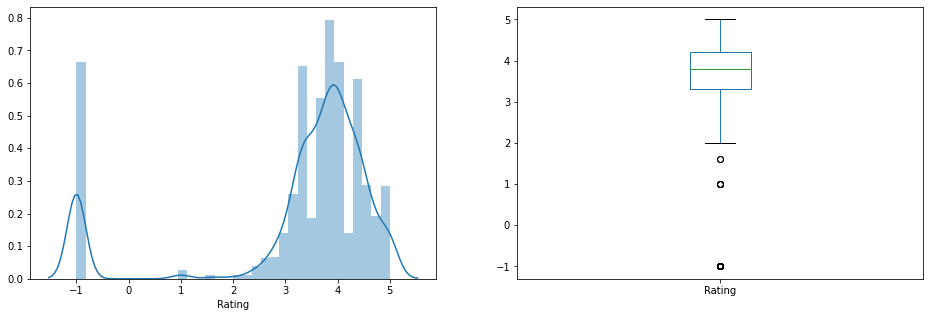

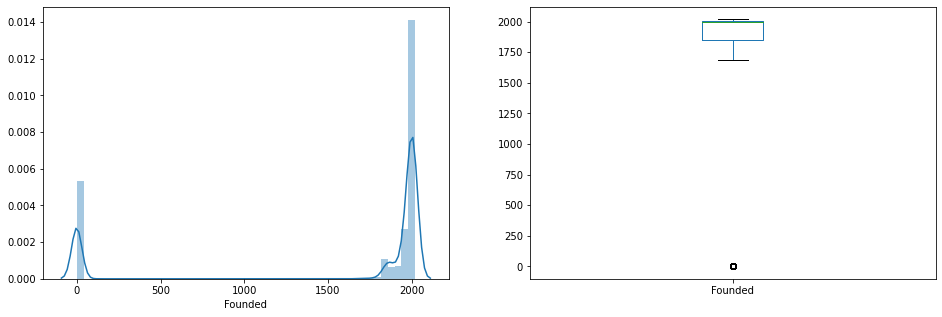

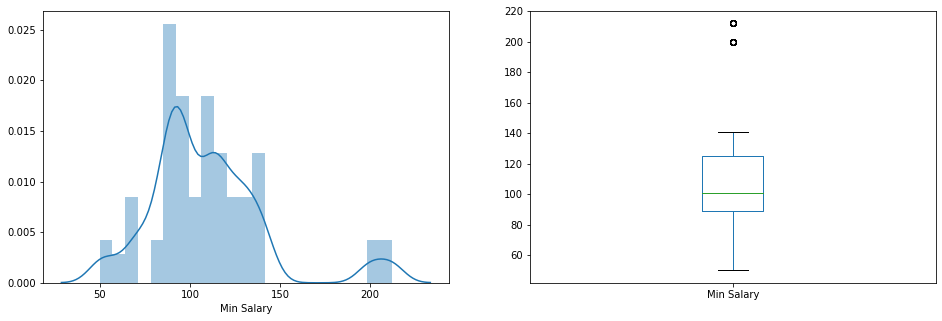

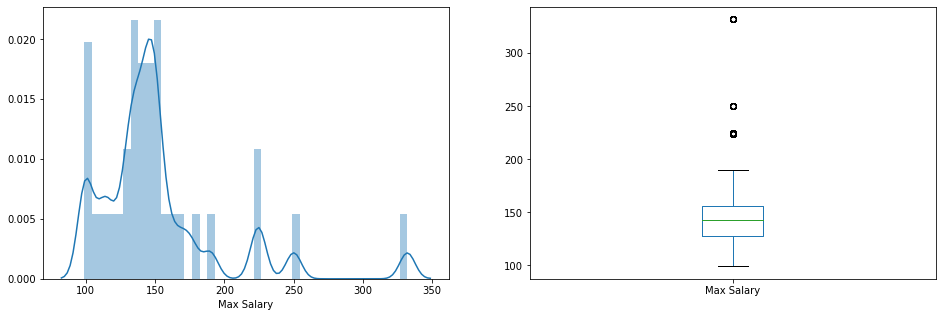

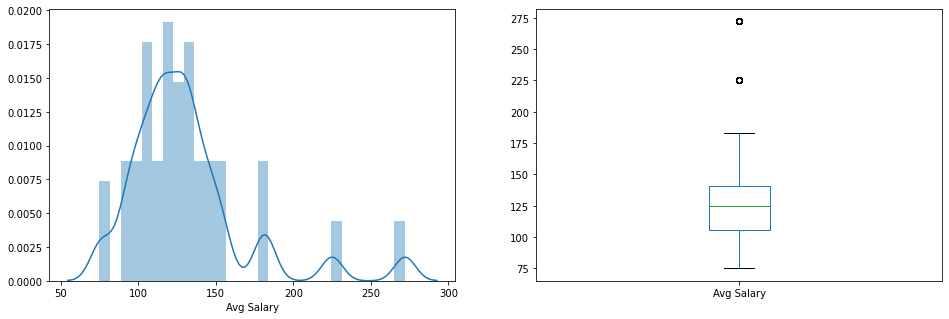

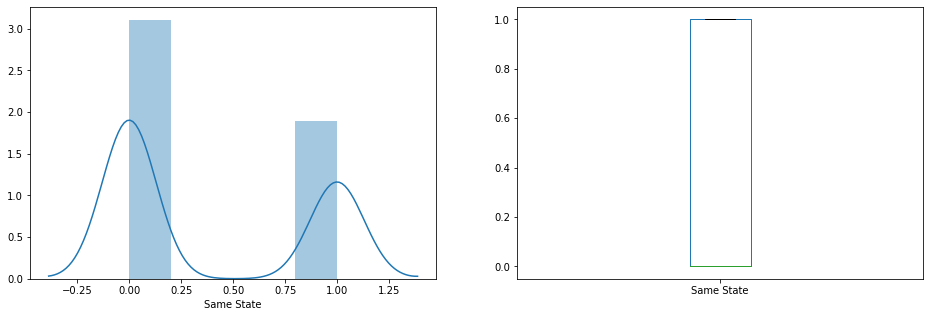

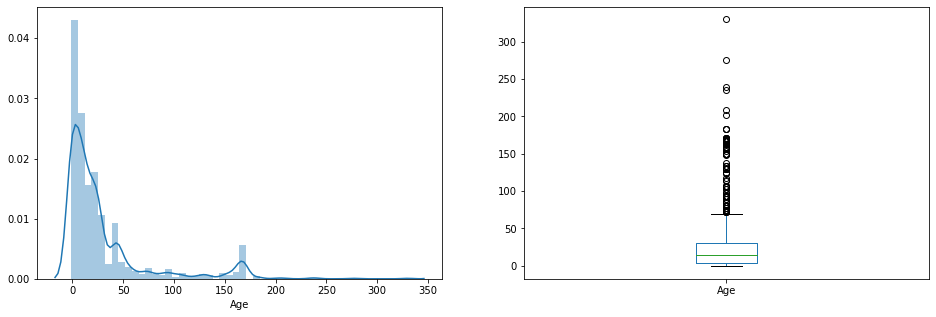

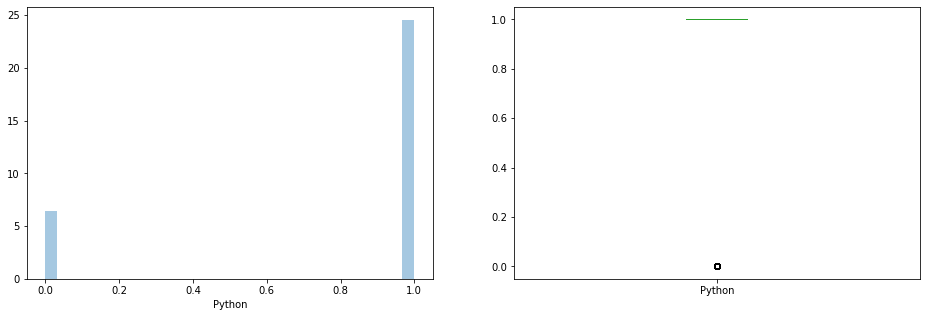

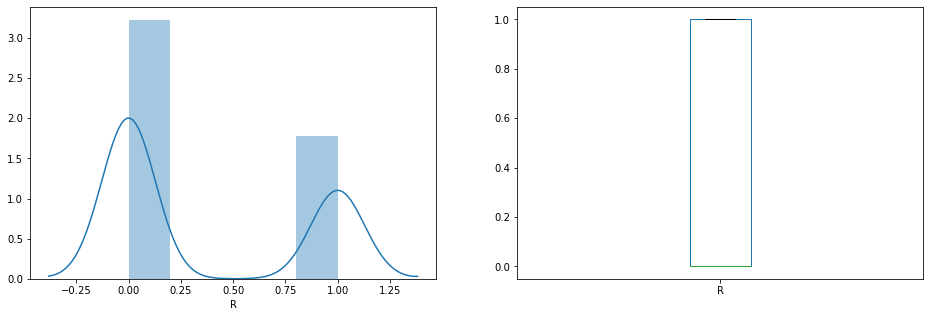

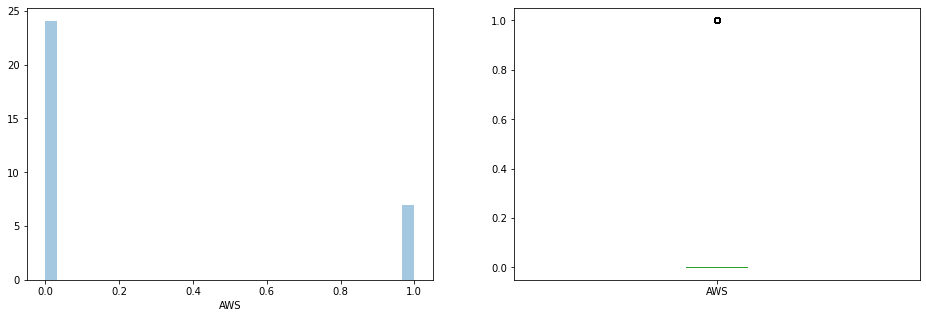

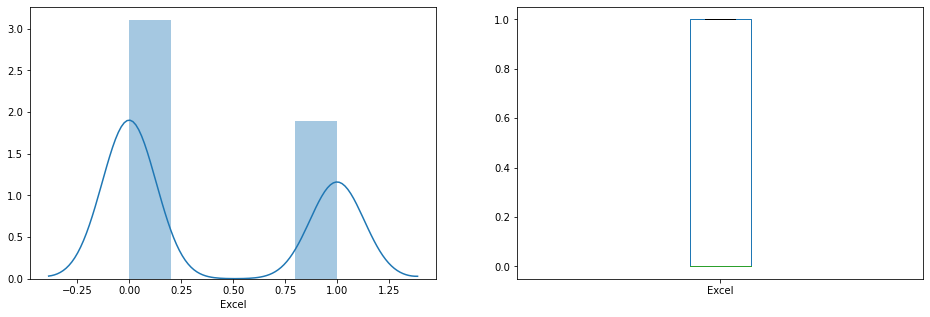

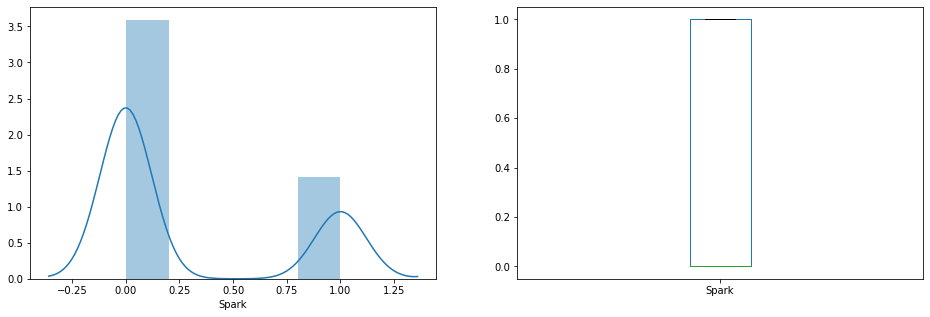

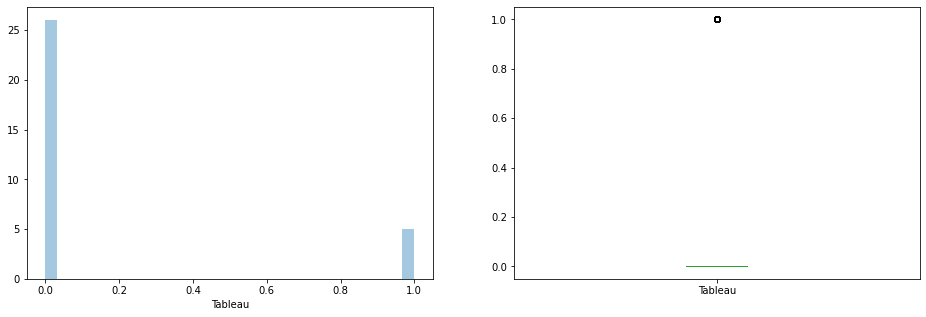

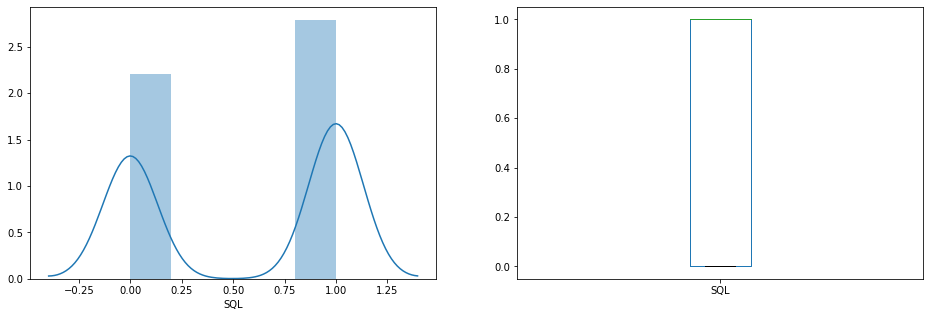

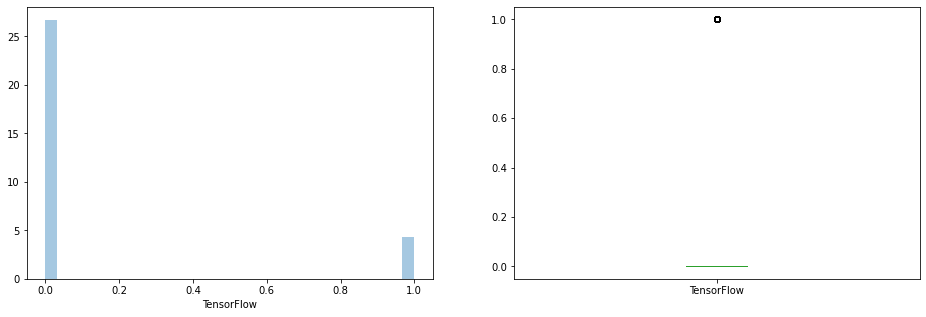

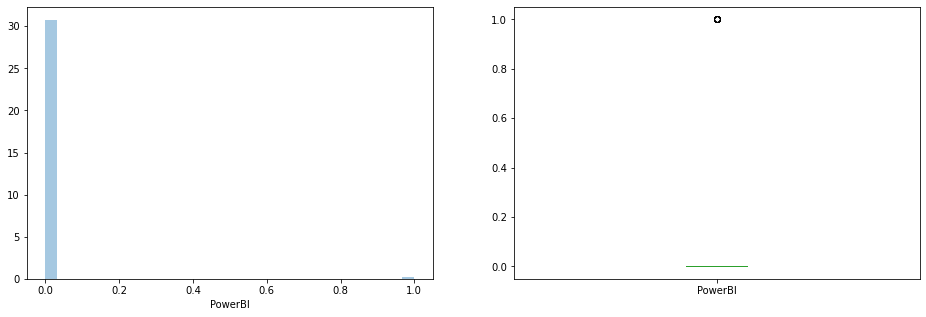

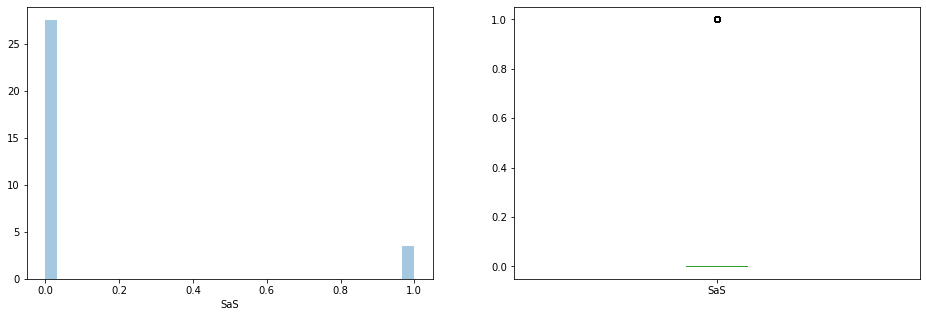

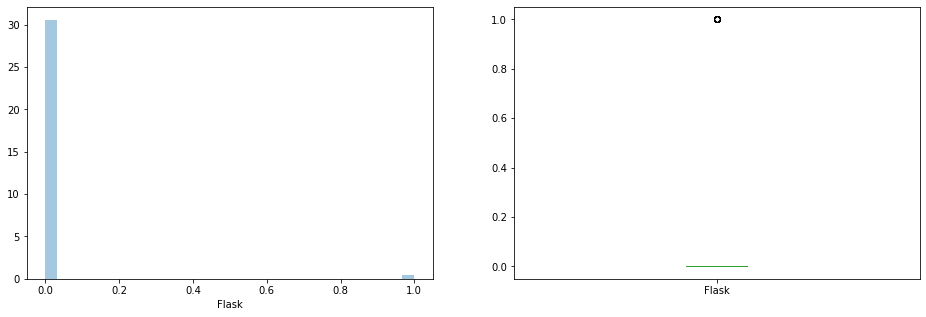

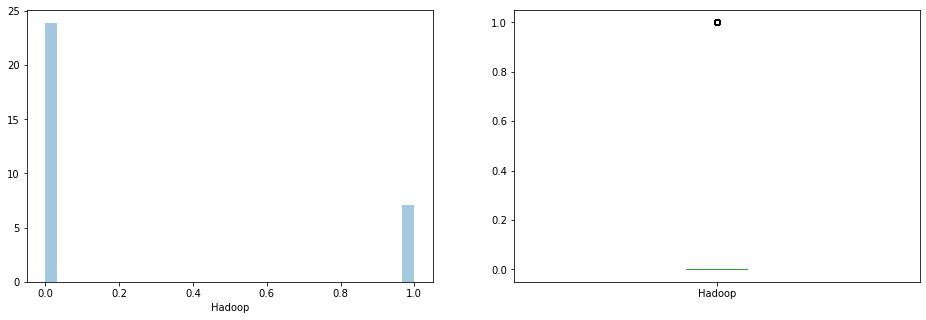

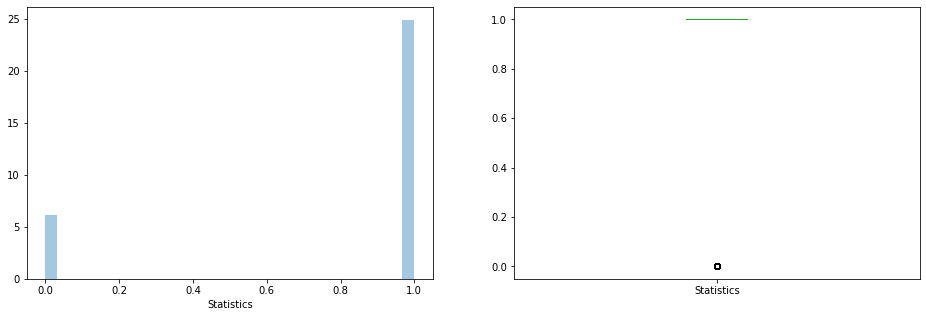

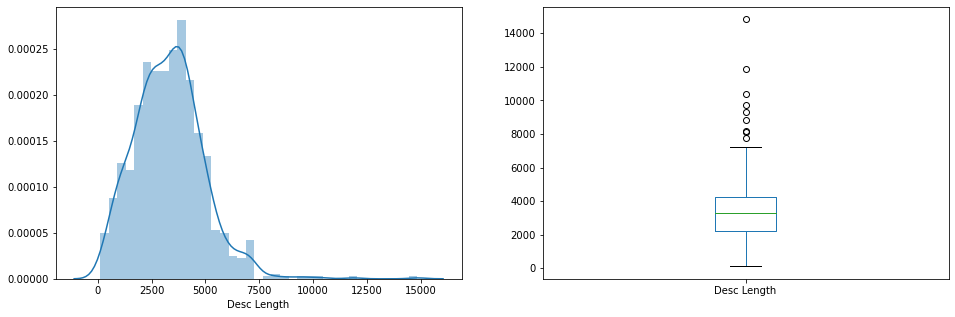

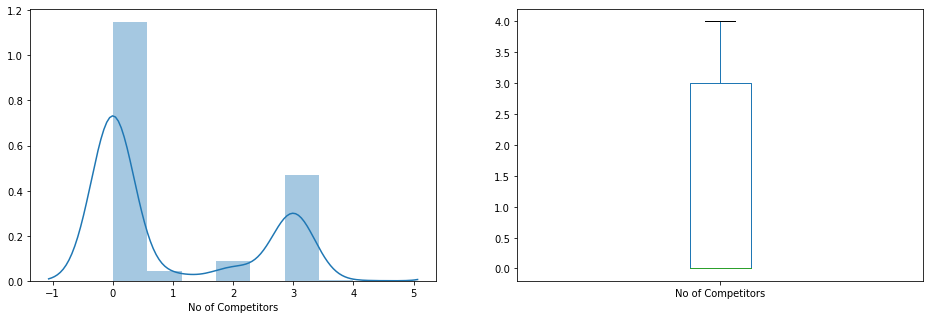

In [17]:
Visualizer.show_displot(df)

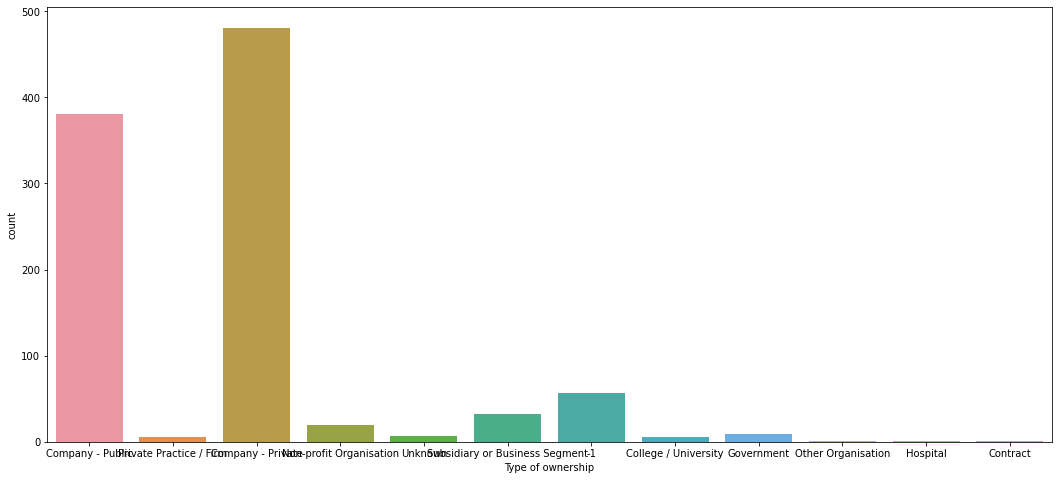

In [22]:
Visualizer.Show_CountPlot(df['Type of ownership'])

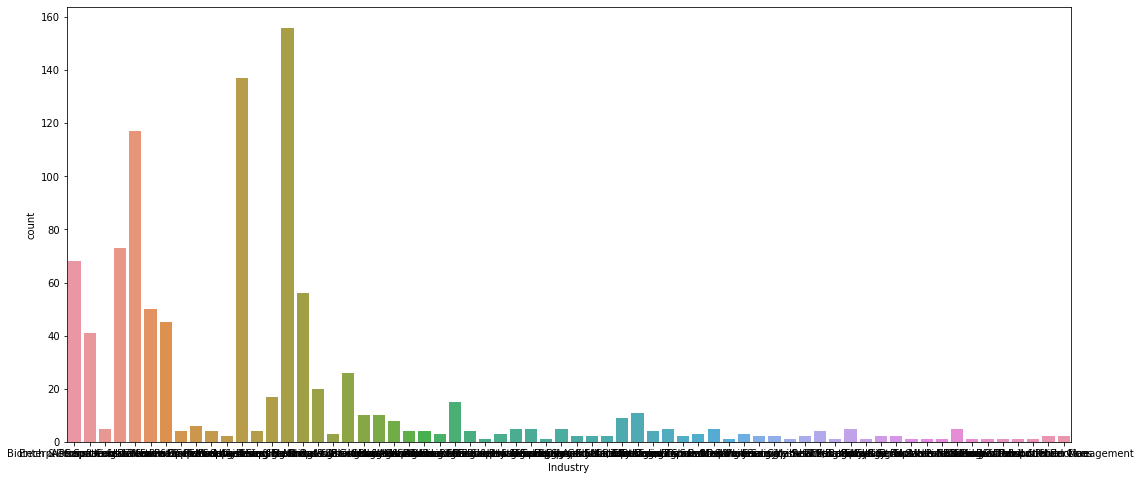

In [23]:
Visualizer.Show_CountPlot(df['Industry'])

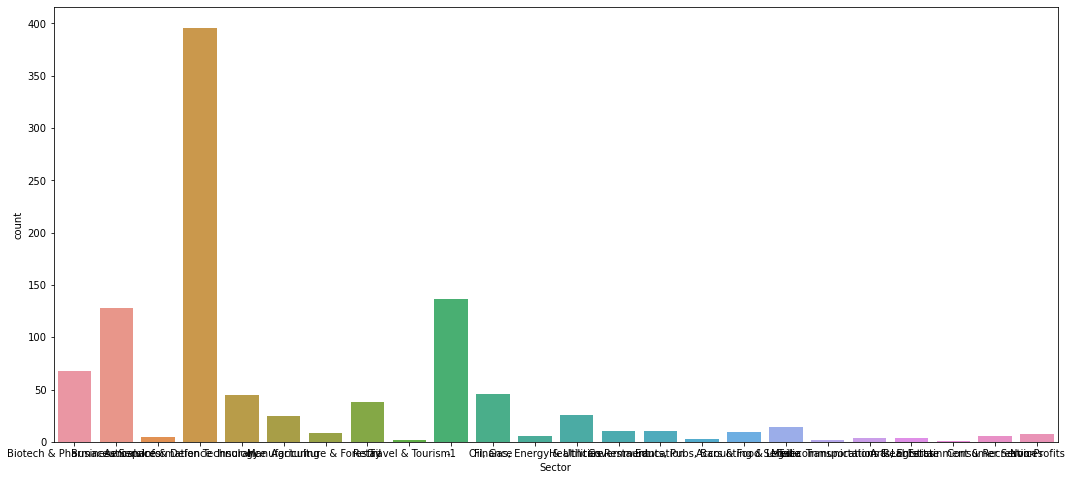

In [24]:
Visualizer.Show_CountPlot(df['Sector'])

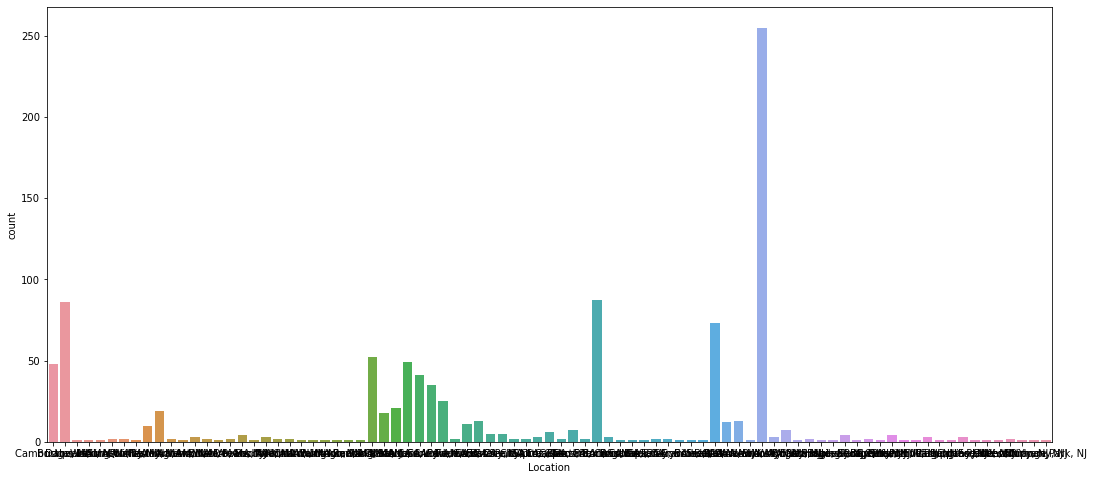

In [25]:
Visualizer.Show_CountPlot(df['Location'])

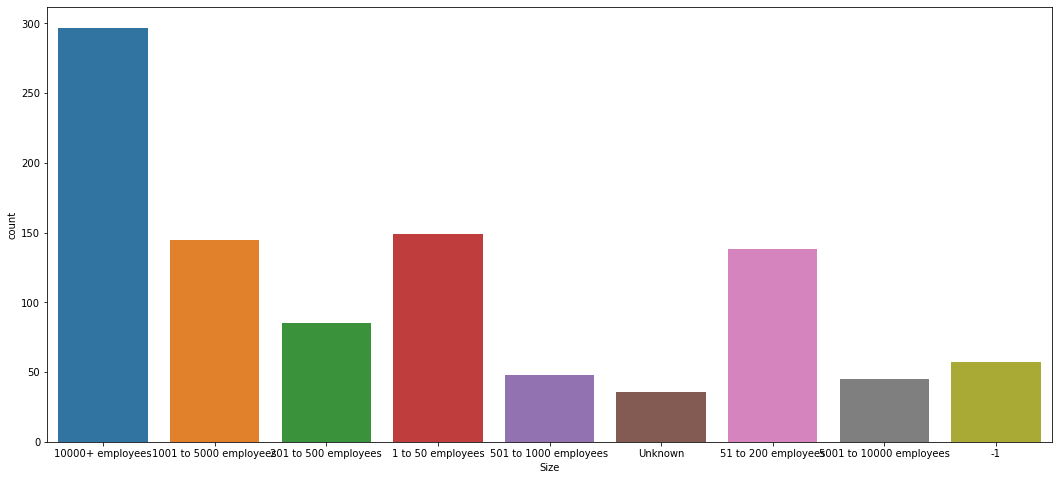

In [26]:
Visualizer.Show_CountPlot(df['Size'])

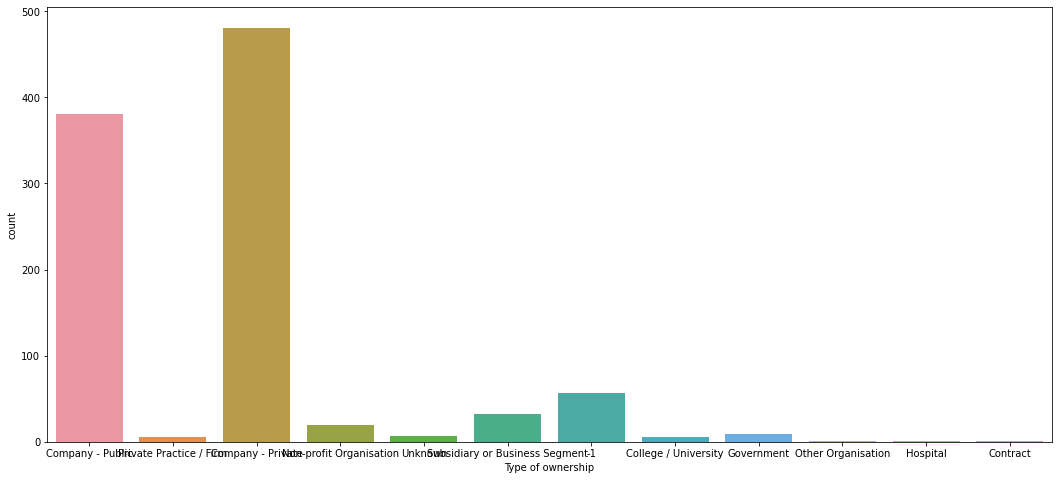

In [27]:
Visualizer.Show_CountPlot(df['Type of ownership'])

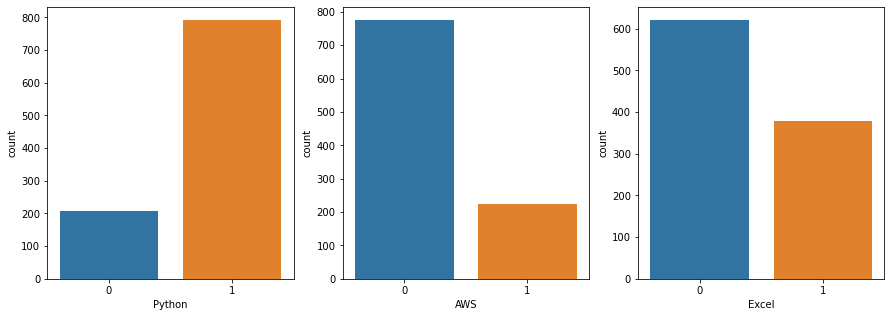

In [28]:
fig,axes = plt.subplots(1,3,figsize=(15,5))
sns.countplot(df['Python'],ax=axes[0])
sns.countplot(df['AWS'],ax=axes[1])
sns.countplot(df['Excel'],ax=axes[2])
# plt.title("Top Skills required for Data Scientist Roles")
plt.savefig("skills")
plt.show()

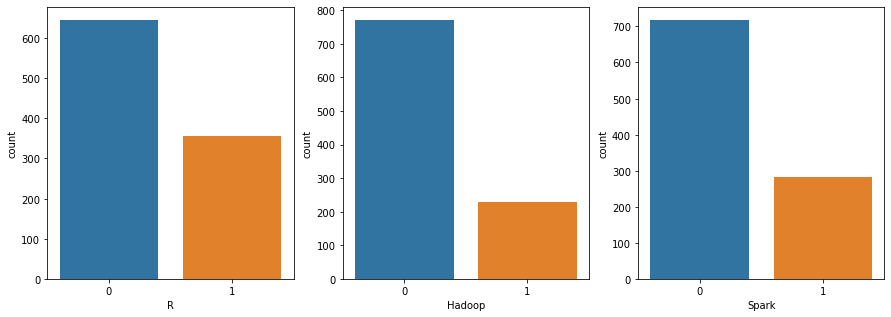

In [29]:
fig,axes = plt.subplots(1,3,figsize=(15,5))

sns.countplot(df['R'],ax=axes[0])
sns.countplot(df['Hadoop'],ax=axes[1])
sns.countplot(df['Spark'],ax=axes[2])
plt.savefig("skills1")
plt.show()

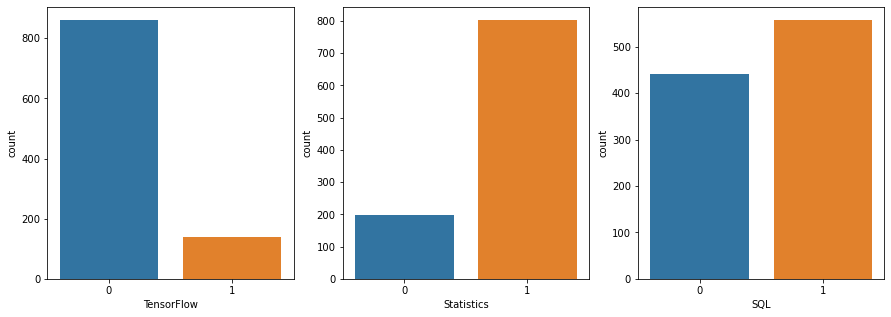

In [30]:
fig,axes = plt.subplots(1,3,figsize=(15,5))

sns.countplot(df['TensorFlow'],ax=axes[0])
sns.countplot(df['Statistics'],ax=axes[1])
sns.countplot(df['SQL'],ax=axes[2])
plt.savefig("skills2")
plt.show()

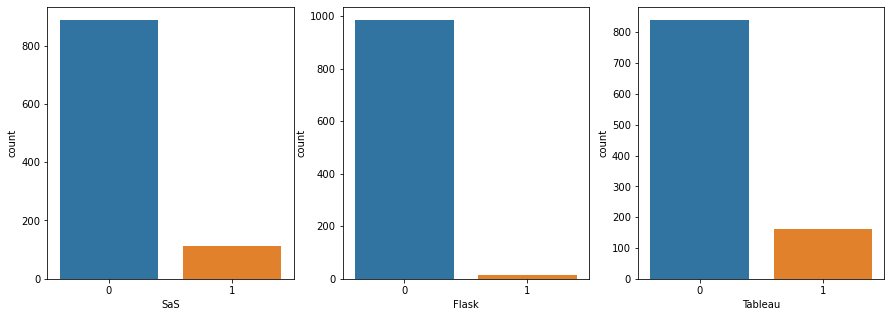

In [31]:
fig,axes = plt.subplots(1,3,figsize=(15,5))

sns.countplot(df['SaS'],ax=axes[0])
sns.countplot(df['Flask'],ax=axes[1])
sns.countplot(df['Tableau'],ax=axes[2])
plt.savefig("skills3")
plt.show()

In [ ]:
Visualizer

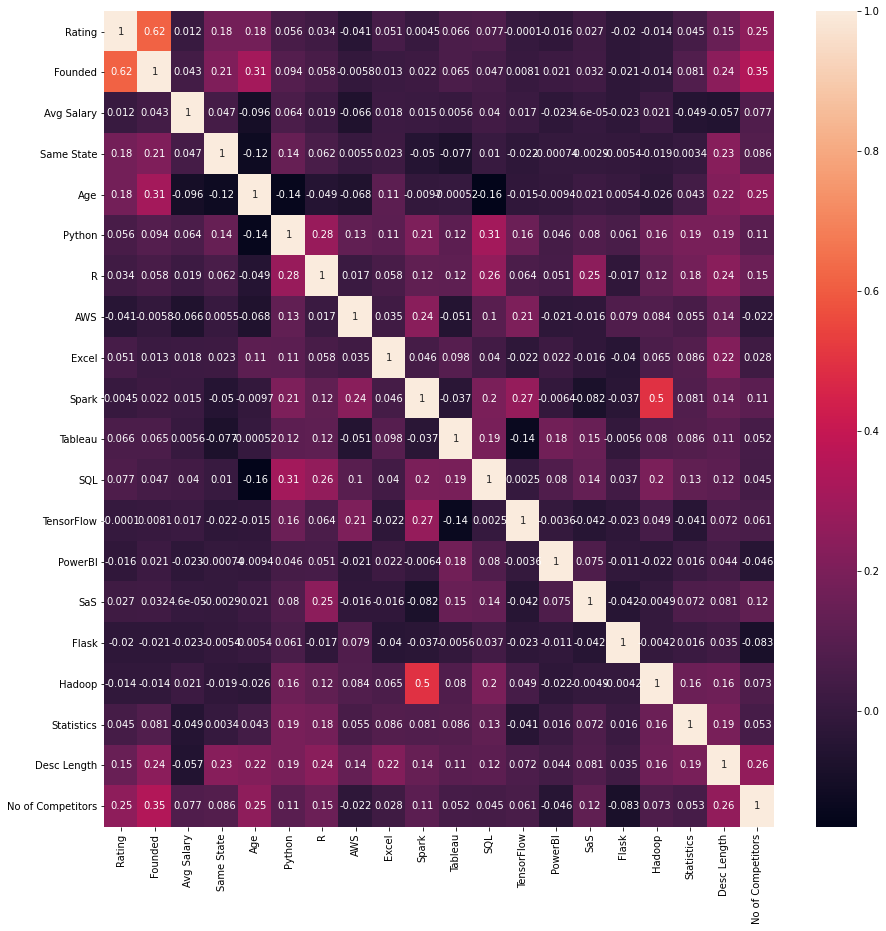

In [37]:
Visualizer.Show_HeatMap(df)

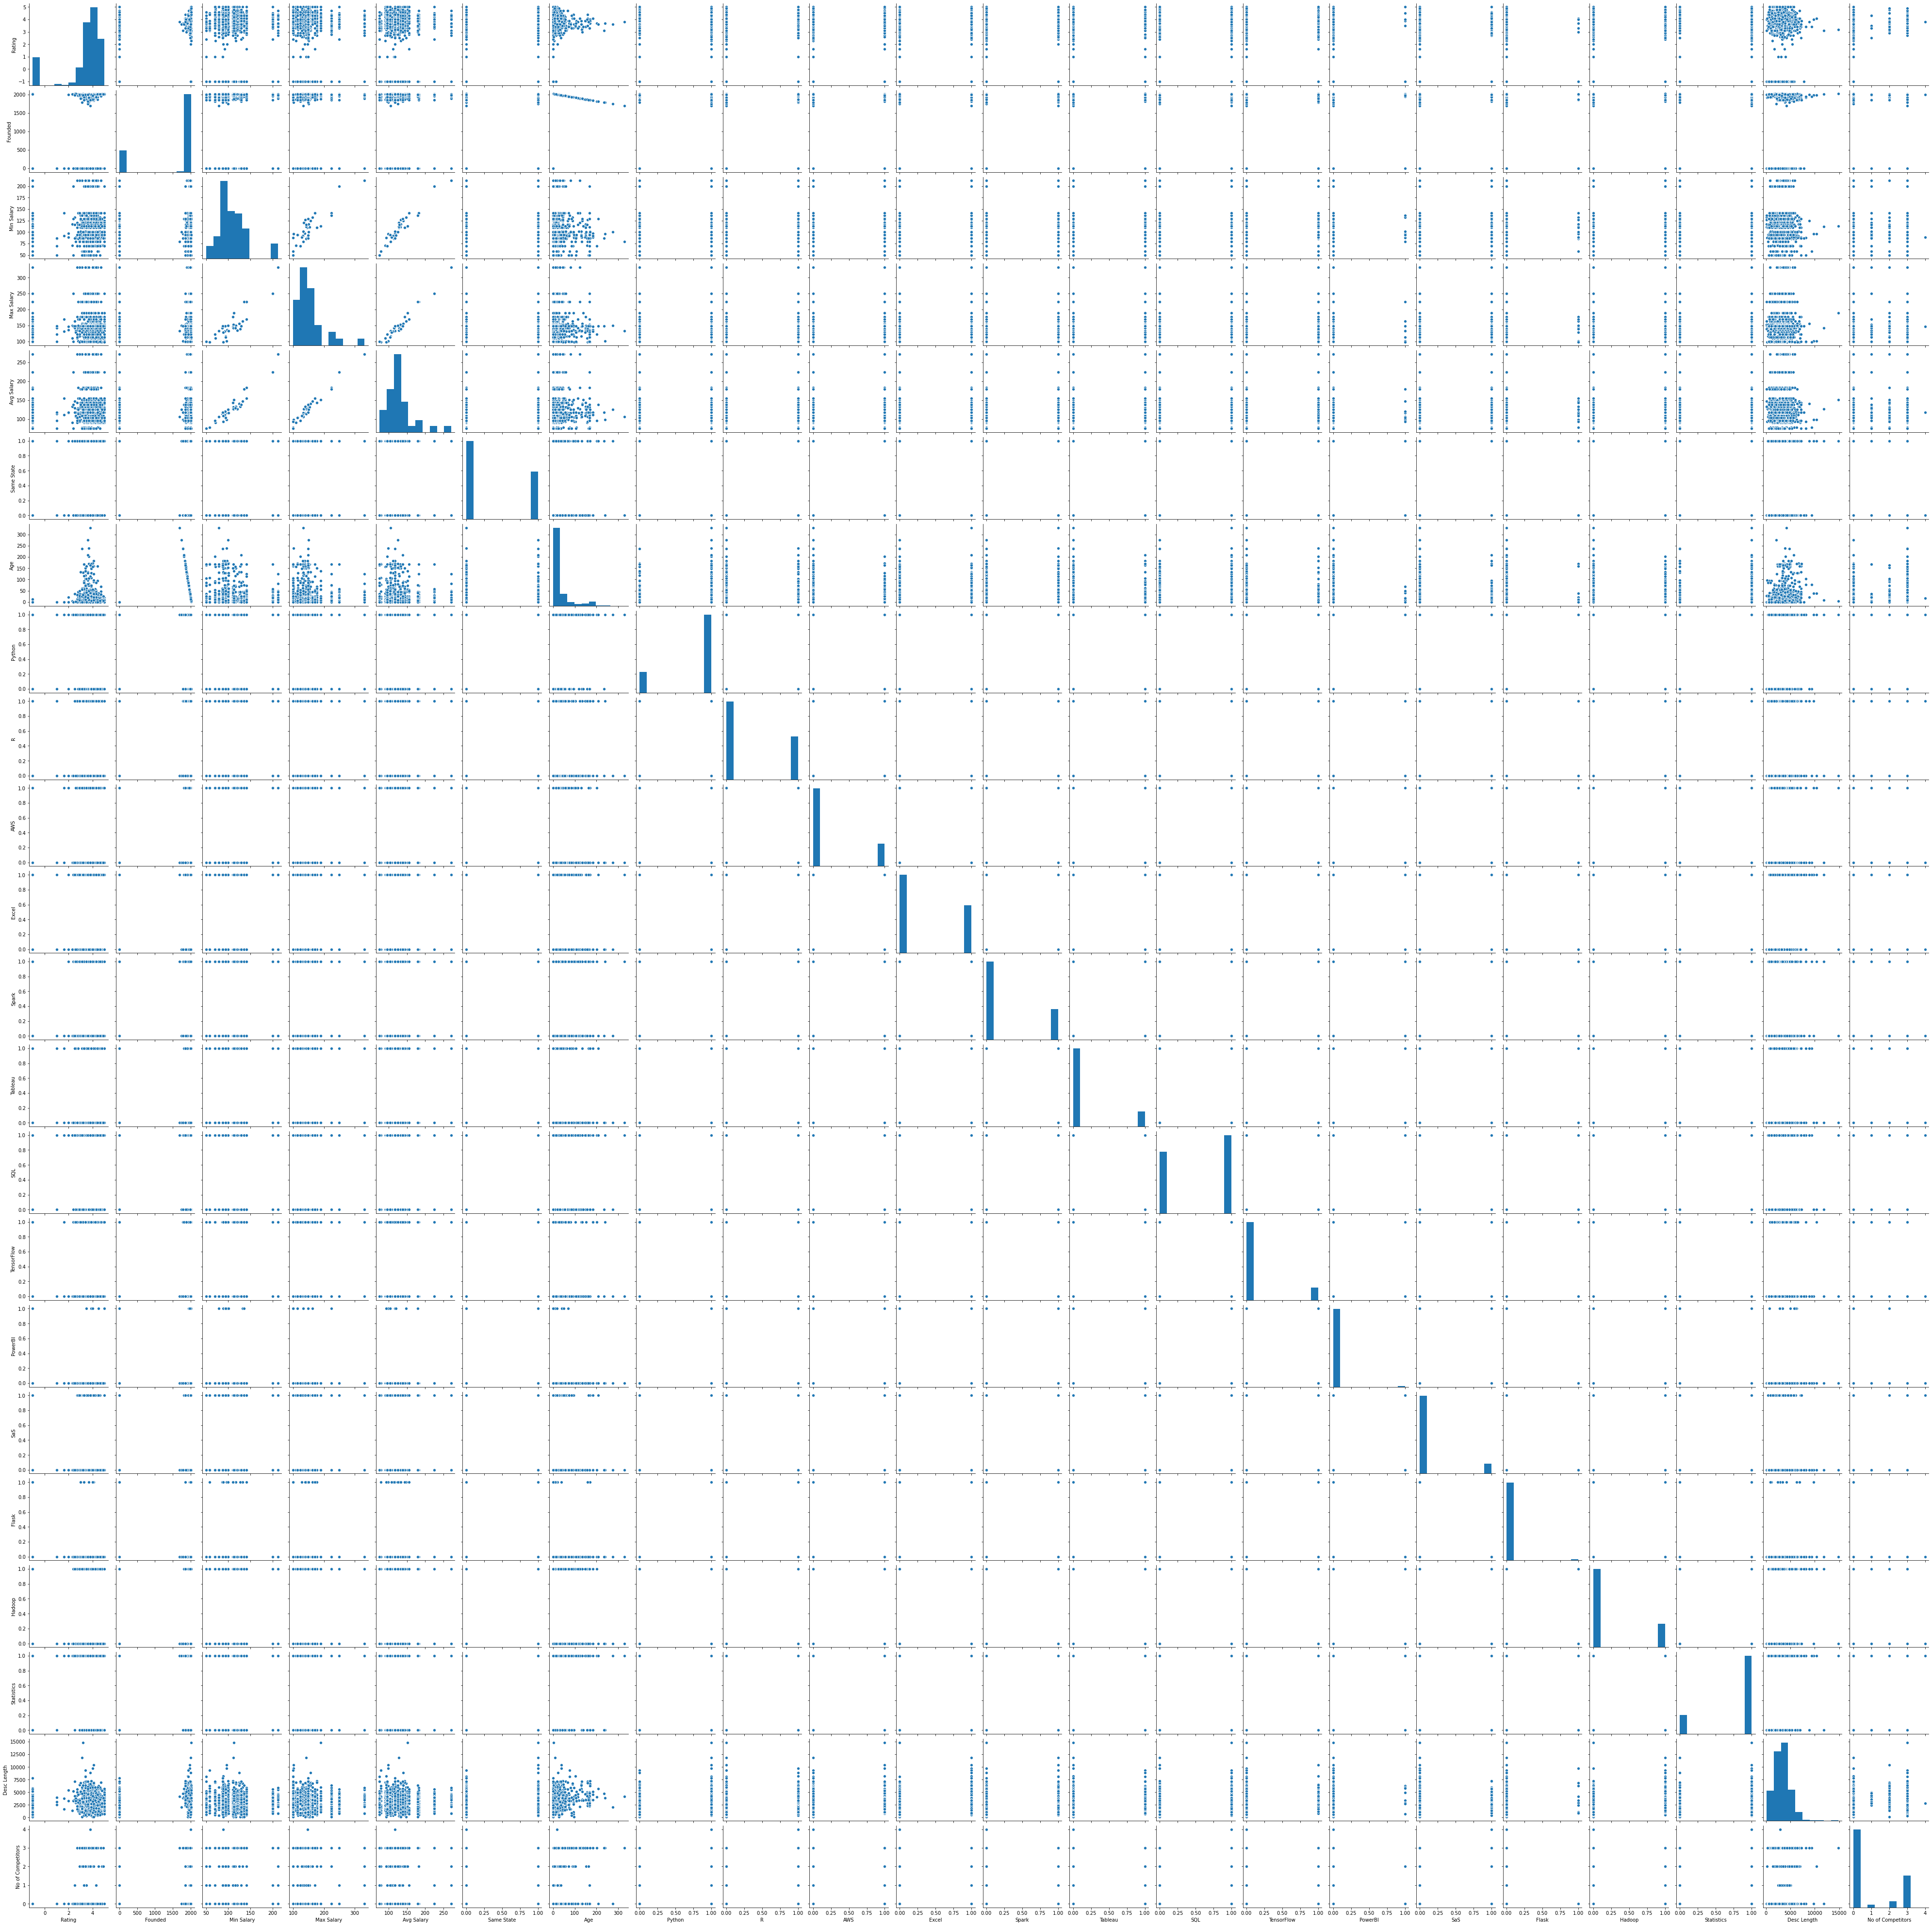

In [38]:
Visualizer.Show_PairPlot(df)

In [55]:
Visualizer.Show_Pivot_Table(df,'Seniority','Avg Salary')

,Avg Salary
Seniority,
junior,122.555556
na,131.211288
senior,129.500000


In [56]:
Visualizer.Show_Pivot_Table(df,'Job State','Avg Salary').sort_values(by='Avg Salary',ascending=False)

,Avg Salary
Job State,
CA,150.675000
WA,134.000000
NJ,118.383333
NY,118.005639
MA,107.975000
CT,103.500000


In [57]:
Visualizer.Show_Pivot_Table(df,'Sector','Avg Salary').sort_values(by='Avg Salary',ascending=False)

,Avg Salary
Sector,
Telecommunications,186.250000
Accounting & Legal,147.222222
Education,145.700000
Information Technology,140.672980
Aerospace & Defence,140.300000
Non-Profits,134.000000
Government,133.500000
Real Estate,129.125000
Manufacturing,128.060000


In [58]:
Visualizer.Show_Pivot_Table(df,'Python','Avg Salary').sort_values(by='Avg Salary',ascending=False)

,Avg Salary
Python,
1,131.895202
0,125.764423


In [59]:
Visualizer.Show_Pivot_Table(df,'Excel','Avg Salary').sort_values(by='Avg Salary',ascending=False)

,Avg Salary
Excel,
1,131.488127
0,130.090177


In [60]:
Visualizer.Show_Pivot_Table(df,'Revenue','Avg Salary').sort_values(by='Avg Salary',ascending=False)

,Avg Salary
Revenue,
₹5 to ₹10 billion (INR),141.388889
₹500 million to ₹1 billion (INR),138.894737
₹500+ billion (INR),137.137681
-1,136.578947
₹10 to ₹50 million (INR),133.757576
₹100 to ₹500 million (INR),130.595238
₹1 to ₹5 billion (INR),129.331250
Unknown / Non-Applicable,128.191520
₹100 to ₹500 billion (INR),121.258621


In [61]:
Visualizer.Show_Pivot_Table(df,'Rating','Avg Salary').sort_values(by='Avg Salary',ascending=False)

,Avg Salary
Rating,
2.4,165.875000
4.7,153.960000
4.2,147.840000
4.1,145.184211
4.4,140.844262
4.3,138.957447
1.6,133.750000
-1.0,132.500000
2.7,132.071429


In [62]:
Visualizer.Show_Pivot_Table(df,'Type of ownership','Avg Salary').sort_values(by='Avg Salary',ascending=False)

,Avg Salary
Type of ownership,
Other Organisation,147.500000
-1,136.578947
Company - Public,136.328084
Government,133.944444
Contract,133.000000
Hospital,133.000000
Unknown,127.857143
Company - Private,126.475052
Subsidiary or Business Segment,125.234375


In [79]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
words = " ".join(df['Job Description'])
class Text_Preprocessing():

    def __init__(self):
        
        print("Visualizer object created")
        
    def punctuation_stop(self,text):
        """remove punctuation and stop words"""
        filtered = []
        stop_words = set(stopwords.words('english'))
        word_tokens = word_tokenize(text)
        for w in word_tokens:
            if w not in stop_words and w.isalpha():
                filtered.append(w.lower())
        return filtered 
    
    def wordcloud(self,text):
        wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
        wc.generate(text)

        plt.figure(figsize=[10,10])
        plt.imshow(wc,interpolation="bilinear")
        plt.axis('off')
        plt.show()

In [80]:
nlp = Text_Preprocessing()

Visualizer object created


In [69]:
words_filtered = nlp.punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

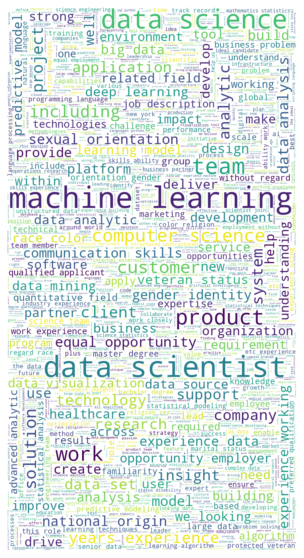

In [81]:
nlp.wordcloud(text)

In [ ]:
df.to_csv("EDA.csv",index=False)